## Business Problem

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.

The objective is predicting store sales using historical markdown data.

### Import Important libraries

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import data
path = 'C:/Users/Yoga 500/Downloads/Analytix Labs/Assignments/Final Projects/Supervised Learning(Regression.Classification, Forecasting)/Walmart/2. Walmart Store Sales Forecasting/data/'
stores = pd.read_csv(path + 'stores.csv')
features = pd.read_csv(path + 'features.csv')
train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [3]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [7]:
train.shape

(421570, 5)

In [8]:
test.shape

(115064, 4)

In [9]:
stores.shape

(45, 3)

In [10]:
features.shape

(8190, 12)

### Data Preparation

In [11]:
#adding weekly_sales column to test dataframe to combine it with train set in order to 
#have same data preparation in both sets
test['Weekly_Sales'] = np.NAN

In [12]:
test.head()

,Store,Dept,Date,IsHoliday,Weekly_Sales
0,1,1,2012-11-02,False,NaN
1,1,1,2012-11-09,False,NaN
2,1,1,2012-11-16,False,NaN
3,1,1,2012-11-23,True,NaN
4,1,1,2012-11-30,False,NaN


In [13]:
test = test[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']]

In [14]:
train = pd.concat([train,test], axis = 0)

In [15]:
train.shape

(536634, 5)

In [16]:
stores_temp = pd.merge(left = train, right = stores, on ='Store', how = 'left')

In [17]:
stores_temp.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [18]:
stores_temp.shape

(536634, 7)

In [19]:
store_data = pd.merge(left = stores_temp, right= features, on = ['Store', 'Date'], how = 'left')
store_data.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
536629,45,98,2013-06-28,NaN,False,B,118221,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
536630,45,98,2013-07-05,NaN,False,B,118221,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
536631,45,98,2013-07-12,NaN,False,B,118221,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
536632,45,98,2013-07-19,NaN,False,B,118221,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
536633,45,98,2013-07-26,NaN,False,B,118221,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [20]:
store_data.drop(columns=['IsHoliday_y'], inplace=True)

In [21]:
store_data.rename(columns={'IsHoliday_x' : 'IsHoliday'}, inplace = True)

In [22]:
store_data.shape

(536634, 16)

In [23]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536634 entries, 0 to 536633
Data columns (total 16 columns):
Store           536634 non-null int64
Dept            536634 non-null int64
Date            536634 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       536634 non-null bool
Type            536634 non-null object
Size            536634 non-null int64
Temperature     536634 non-null float64
Fuel_Price      536634 non-null float64
MarkDown1       265596 non-null float64
MarkDown2       197685 non-null float64
MarkDown3       242326 non-null float64
MarkDown4       237143 non-null float64
MarkDown5       266496 non-null float64
CPI             498472 non-null float64
Unemployment    498472 non-null float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 66.0+ MB


In [24]:
# Convert date column to Date type

dates = pd.to_datetime(store_data['Date'], format='%Y-%m-%d')

In [25]:
store_data['Date'] = dates

In [26]:
#chnaging the column names to lower-case
store_data.columns = store_data.columns.str.lower()
print(store_data.columns)

Index(['store', 'dept', 'date', 'weekly_sales', 'isholiday', 'type', 'size',
       'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3',
       'markdown4', 'markdown5', 'cpi', 'unemployment'],
      dtype='object')


### checking our Y variable(Weekly_sales)

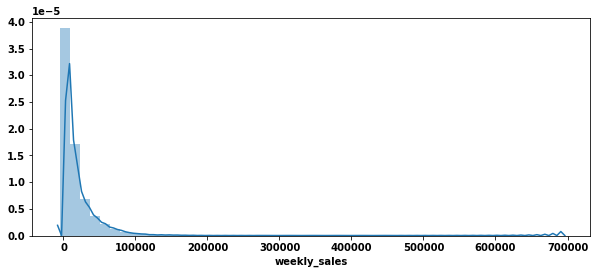

In [27]:
plt.figure(figsize=(10,4))
sns.distplot(store_data[store_data.weekly_sales.notna()].weekly_sales)
plt.show()

In [28]:
store_data[store_data.weekly_sales<=0].shape

(1358, 16)

In [29]:
store_data.shape

(536634, 16)

As the number of records with negative sales are way much lower than the total data , we can drop those records from our analysis

In [30]:
store_data.drop(store_data[store_data.weekly_sales<=0].index, inplace = True)

In [31]:
store_data[(store_data.markdown2<=0) & (store_data.weekly_sales.notna()) ].shape

(1509, 16)

In [32]:
store_data.drop(store_data[(store_data.markdown2<=0) & (store_data.weekly_sales.notna())].index, inplace = True)

In [33]:
store_data.shape

(533767, 16)

### Create some useful derived variables

In [34]:
store_data['year'] = store_data.date.apply(lambda x : x.year)
store_data['month'] = store_data.date.apply(lambda x : x.strftime('%b'))

#can use calendar package as well
store_data['quarter'] = store_data.date.apply(lambda x : x.quarter)
store_data['week'] = store_data.date.apply(lambda x : x.week)


In [35]:
##create columns for specifying if the date falls under which special holiday

dates_superbowl = pd.to_datetime(['12-Feb-2010', '11-Feb-2011', '10-Feb-2012', '08-Feb-2013'], format='%d-%b-%Y')
dates_labourday = pd.to_datetime(['10-Sep-2010', '09-Sep-2011', '07-Sep-2012', '06-Sep-2013'], format='%d-%b-%Y')
dates_thanksgiving = pd.to_datetime(['26-Nov-2010', '25-Nov-2011', '23-Nov-2012', '29-Nov-2013'], format='%d-%b-%Y')
dates_christmas = pd.to_datetime(['31-Dec-2010', '30-Dec-2011', '28-Dec-2012', '27-Dec-2013'], format='%d-%b-%Y')

def fn_holiday_name(x,y, holiday):
    if(holiday == 'super_bowl'):
        if((x == True) and (y in dates_superbowl)):
            return 1      
        else:
            return 0
    elif(holiday == 'labour_day'):
        if((x == True) and (y in dates_labourday)):
            return 1      
        else:
            return 0
    elif(holiday == 'thanksgiving'):
        if((x == True) and (y in dates_thanksgiving)):
            return 1      
        else:
            return 0
    elif(holiday == 'christmas'):
        if((x == True) and (y in dates_christmas)):
            return 1      
        else:
            return 0
    
        
store_data['super_bowl'] = store_data.apply(lambda x : fn_holiday_name(x['isholiday'], x['date'], 'super_bowl'), axis = 1)
store_data['labour_day'] = store_data.apply(lambda x : fn_holiday_name(x['isholiday'], x['date'], 'labour_day'), axis = 1)
store_data['thanksgiving'] = store_data.apply(lambda x : fn_holiday_name(x['isholiday'], x['date'], 'thanksgiving'), axis = 1)
store_data['christmas'] = store_data.apply(lambda x : fn_holiday_name(x['isholiday'], x['date'], 'christmas'), axis = 1)


In [36]:
agg_data = store_data[store_data.weekly_sales.notna()].groupby(['store', 'dept']).weekly_sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()

In [37]:
agg_data[agg_data['std'].isnull()].shape

(40, 7)

In [38]:
#Adding mean,max,min,median and std variables to our dataset

store_data_final = pd.merge(left = store_data, right = agg_data , on = ['store', 'dept'], how = 'left')

In [39]:
store_data_final.shape

(533767, 29)

In [40]:
store_data_final.rename(columns={'max' : 'max_weeklySales',
                                 'min' : 'min_weeklySales',
                                 'mean': 'avg_weeklySales',
                                 'median' : 'median_weeklySales',
                                 'std' : 'std_weeklySales'
                                }, inplace = True)

In [41]:
store_data_final.tail()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
533762,45,98,2013-06-28,NaN,False,B,118221,76.05,3.639,4842.29,...,26,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533763,45,98,2013-07-05,NaN,False,B,118221,77.50,3.614,9090.48,...,27,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533764,45,98,2013-07-12,NaN,False,B,118221,79.37,3.614,3789.94,...,28,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533765,45,98,2013-07-19,NaN,False,B,118221,82.84,3.737,2961.49,...,29,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533766,45,98,2013-07-26,NaN,False,B,118221,76.06,3.804,212.02,...,30,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705


### Identifying Categorical and continous variables

In [42]:
store_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 533767 entries, 0 to 533766
Data columns (total 29 columns):
store                 533767 non-null int64
dept                  533767 non-null int64
date                  533767 non-null datetime64[ns]
weekly_sales          418703 non-null float64
isholiday             533767 non-null bool
type                  533767 non-null object
size                  533767 non-null int64
temperature           533767 non-null float64
fuel_price            533767 non-null float64
markdown1             263587 non-null float64
markdown2             195832 non-null float64
markdown3             240513 non-null float64
markdown4             235185 non-null float64
markdown5             264484 non-null float64
cpi                   495605 non-null float64
unemployment          495605 non-null float64
year                  533767 non-null int64
month                 533767 non-null object
quarter               533767 non-null int64
week                  5

In [43]:
store_data_final.date.nunique()

182

In [44]:
cat_var_list = ['store', 'dept', 'date', 'isholiday', 'type', 'year', 'month','week', 'quarter', 'super_bowl', 'labour_day',
                'thanksgiving', 'christmas']

In [45]:
cont_var_list = store_data_final.columns.difference(cat_var_list)

In [46]:
cont_var_list

Index(['avg_weeklySales', 'cpi', 'fuel_price', 'markdown1', 'markdown2',
       'markdown3', 'markdown4', 'markdown5', 'max_weeklySales',
       'median_weeklySales', 'min_weeklySales', 'size', 'std_weeklySales',
       'temperature', 'unemployment', 'weekly_sales'],
      dtype='object')

In [47]:
cat_var_list

['store',
 'dept',
 'date',
 'isholiday',
 'type',
 'year',
 'month',
 'week',
 'quarter',
 'super_bowl',
 'labour_day',
 'thanksgiving',
 'christmas']

In [48]:
store_data_final.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,5,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,6,1,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,7,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,8,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,9,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032


### Profiling

In [49]:
import pandas_profiling
profiling_store = store_data_final.profile_report()
profiling_store.to_file(output_file = 'profiling_store.html')

In [50]:
### Basic UDFs for data cleaning

In [51]:
def continous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),x.std(),
                      x.var(), x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), x.quantile(0.25),
                      x.quantile(0.50), x.quantile(0.75), x.quantile(0.90), x.quantile(0.95), 
                      x.quantile(0.99), x.max()],
                    index = ['N', 'NMiss', 'Sum', 'Mean', 'Median', 'SD', 'Var', 'Min', 'P1', 'P5', 'P10','P25',
                            'P50', 'P75', 'P90', 'P95', 'P99', 'Max'])
    

In [52]:
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0,1],
                     round((Mode.iloc[0,1]*100)/x.count(), 2)],
                     index = ['N', 'NMiss', 'Mode', 'Freq', 'Percent'])

In [53]:
#function for creating dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first= True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace= True)
    return df

### Data Inspection

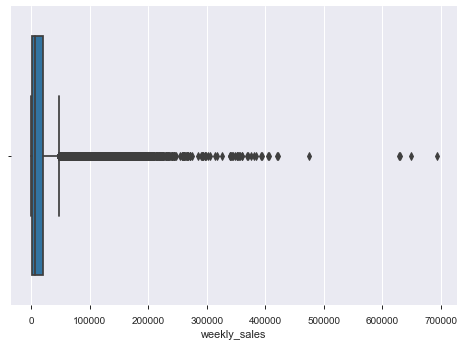

In [54]:
#Plot the variables
sns.boxplot(store_data_final.weekly_sales)

In [55]:
store_data_final_train = store_data_final[store_data_final.weekly_sales.notna()]
store_data_final_train[cont_var_list].apply(lambda x : continous_var_summary(x)).round(3).T

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_weeklySales,418703.0,0.0,6.711581e+09,16029.455,8015.876,21597.564,4.664548e+08,0.018,22.821,101.844,430.984,2394.080,8015.876,20352.894,42181.470,59830.190,101261.401,182847.957
cpi,418703.0,0.0,7.169120e+07,171.222,182.381,39.164,1.533781e+03,126.064,126.112,126.496,128.824,132.023,182.381,212.445,219.432,221.942,225.464,227.233
fuel_price,418703.0,0.0,1.406566e+06,3.359,3.452,0.458,2.100000e-01,2.472,2.565,2.653,2.720,2.931,3.452,3.737,3.917,4.029,4.202,4.468
markdown1,148672.0,270031.0,1.078766e+09,7256.016,5347.450,8326.015,6.932252e+07,0.270,17.760,148.799,373.340,2229.320,5347.450,9235.590,15384.570,21823.530,41524.030,88646.760
markdown2,109395.0,309308.0,3.693666e+08,3376.448,203.260,9517.143,9.057601e+07,0.020,0.300,3.000,7.910,44.200,203.260,1991.380,8716.860,16590.750,50366.600,104519.540
markdown3,135278.0,283425.0,1.937941e+08,1432.562,24.600,9625.813,9.265628e+07,-29.100,0.060,0.650,1.650,5.060,24.600,104.430,406.400,1059.900,63143.290,141630.610
markdown4,133009.0,285694.0,4.517710e+08,3396.545,1458.770,6327.337,4.003519e+07,0.220,3.970,28.760,108.710,501.160,1458.770,3595.040,7981.570,12823.700,37091.670,67474.850
markdown5,149420.0,269283.0,6.939211e+08,4644.098,3369.860,5983.416,3.580126e+07,135.160,351.970,709.950,1064.560,1881.030,3369.860,5588.470,8346.740,11447.140,27754.230,108519.280
max_weeklySales,418703.0,0.0,1.455254e+10,34756.243,18410.270,50460.511,2.546263e+09,0.020,95.760,413.600,1404.880,6092.180,18410.270,44921.080,82766.070,115565.700,257375.390,693099.360
median_weeklySales,418703.0,0.0,6.363880e+09,15199.032,7366.990,21148.154,4.472444e+08,0.020,15.915,75.815,352.000,2107.030,7366.990,19080.730,40405.700,58370.010,98652.110,180099.160


In [56]:
store_data_final[(store_data_final.markdown3<=0) & (store_data_final.weekly_sales.notna())].shape

(323, 29)

In [57]:
##Removing records with negative makdown3 values from train set

In [58]:
store_data_final.drop(store_data_final[(store_data_final.markdown3<=0) & (store_data_final.weekly_sales.notna())].index, inplace = True)

In [59]:
store_data_final_train = store_data_final[store_data_final.weekly_sales.notna()]
store_data_final_train[cat_var_list].apply(lambda x : categorical_var_summary(x)).round(3).T

,N,NMiss,Mode,Freq,Percent
store,418380,0,13,10457,2.5
dept,418380,0,1,6408,1.53
date,418380,0,2011-12-23 00:00:00,3018,0.72
isholiday,418380,0,False,389226,93.03
type,418380,0,A,214066,51.17
year,418380,0,2011,152827,36.53
month,418380,0,Apr,41002,9.8
week,418380,0,7,8911,2.13
quarter,418380,0,3,116178,27.77
super_bowl,418380,0,0,409507,97.88


### Data Cleaning

#### Outlier treatment

In [60]:
def fn_outlier(val, q1, q3, IQR):
    if val < q1-(1.5*IQR):
        val = q1-(1.5*IQR)
    else:
        if val > q3+(1.5*IQR):
            val = q3+(1.5*IQR)
    return val

In [61]:
def outlier_treatment(x):
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    IQR = q3 - q1
    return x.apply(lambda val : fn_outlier(val, q1, q3, IQR))

In [62]:
store_data_final.shape

(533444, 29)

In [63]:
store_data_final_train = pd.DataFrame(store_data_final[store_data_final.weekly_sales.notna()])
store_data_final_train.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,5,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,6,1,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,7,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,8,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,9,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [64]:
#befpre outlier treatment
store_data_final_train[cont_var_list].apply(lambda x : continous_var_summary(x)).round(3).T

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_weeklySales,418380.0,0.0,6.706280e+09,16029.160,8015.876,21597.991,4.664732e+08,0.018,22.821,101.844,430.984,2394.080,8015.876,20352.894,42181.470,59896.739,101261.401,182847.957
cpi,418380.0,0.0,7.162646e+07,171.200,182.351,39.156,1.533231e+03,126.064,126.112,126.496,128.824,132.023,182.351,212.404,219.400,221.942,225.464,227.233
fuel_price,418380.0,0.0,1.405354e+06,3.359,3.452,0.458,2.100000e-01,2.472,2.565,2.653,2.720,2.931,3.452,3.735,3.916,4.029,4.202,4.468
markdown1,148395.0,269985.0,1.076631e+09,7255.169,5336.520,8333.461,6.944657e+07,0.270,17.760,148.320,373.340,2228.830,5336.520,9235.590,15384.570,21974.470,41848.340,88646.760
markdown2,109186.0,309194.0,3.693181e+08,3382.468,203.260,9525.246,9.073030e+07,0.020,0.300,3.100,7.910,44.200,203.260,2006.620,8716.860,16590.750,50366.600,104519.540
markdown3,134955.0,283425.0,1.937963e+08,1436.007,24.730,9637.068,9.287308e+07,0.010,0.150,0.680,1.700,5.130,24.730,104.920,406.400,1059.900,63143.290,141630.610
markdown4,132732.0,285648.0,4.512167e+08,3399.456,1464.520,6332.821,4.010462e+07,0.220,3.970,28.760,108.370,501.160,1464.520,3595.040,7981.570,12869.780,37091.670,67474.850
markdown5,149097.0,269283.0,6.917391e+08,4639.524,3364.410,5986.754,3.584122e+07,135.160,351.970,709.950,1064.560,1880.310,3364.410,5563.920,8323.510,11311.240,27754.230,108519.280
max_weeklySales,418380.0,0.0,1.454135e+10,34756.327,18410.270,50461.858,2.546399e+09,0.020,95.760,413.600,1404.880,6092.180,18410.270,44921.080,82766.070,115565.700,257375.390,693099.360
median_weeklySales,418380.0,0.0,6.358830e+09,15198.695,7366.990,21148.536,4.472606e+08,0.020,15.915,75.815,352.000,2107.030,7366.990,19080.730,40405.700,58370.010,98652.110,180099.160


In [65]:
store_data_final_train[cont_var_list] = store_data_final_train[cont_var_list].apply(lambda x : outlier_treatment(x))

In [66]:
store_data_final_train.shape

(418380, 29)

In [67]:
#after outlier treatment
store_data_final_train[cont_var_list].apply(lambda x : continous_var_summary(x)).round(3).T
#test

,N,NMiss,Sum,Mean,Median,SD,Var,Min,P1,P5,P10,P25,P50,P75,P90,P95,P99,Max
avg_weeklySales,418380.0,0.0,5.809094e+09,13884.732,8015.876,14697.460,2.160153e+08,0.018,22.821,101.844,430.984,2394.080,8015.876,20352.894,42181.470,47291.116,47291.116,47291.116
cpi,418380.0,0.0,7.162646e+07,171.200,182.351,39.156,1.533231e+03,126.064,126.112,126.496,128.824,132.023,182.351,212.404,219.400,221.942,225.464,227.233
fuel_price,418380.0,0.0,1.405354e+06,3.359,3.452,0.458,2.100000e-01,2.472,2.565,2.653,2.720,2.931,3.452,3.735,3.916,4.029,4.202,4.468
markdown1,148395.0,269985.0,9.643336e+08,6498.423,5336.520,5510.363,3.036410e+07,0.270,17.760,148.320,373.340,2228.830,5336.520,9235.590,15384.570,19745.730,19745.730,19745.730
markdown2,109186.0,309194.0,1.418377e+08,1299.047,203.260,1876.611,3.521670e+06,0.020,0.300,3.100,7.910,44.200,203.260,2006.620,4950.250,4950.250,4950.250,4950.250
markdown3,134955.0,283425.0,9.567330e+06,70.893,24.730,89.670,8.040653e+03,0.010,0.150,0.680,1.700,5.130,24.730,104.920,254.605,254.605,254.605,254.605
markdown4,132732.0,285648.0,3.249081e+08,2447.850,1464.520,2548.647,6.495601e+06,0.220,3.970,28.760,108.370,501.160,1464.520,3595.040,7981.570,8235.860,8235.860,8235.860
markdown5,149097.0,269283.0,6.063167e+08,4066.593,3364.410,2836.640,8.046529e+06,135.160,351.970,709.950,1064.560,1880.310,3364.410,5563.920,8323.510,11089.335,11089.335,11089.335
max_weeklySales,418380.0,0.0,1.250549e+10,29890.271,18410.270,30555.735,9.336529e+08,0.020,95.760,413.600,1404.880,6092.180,18410.270,44921.080,82766.070,103164.430,103164.430,103164.430
median_weeklySales,418380.0,0.0,5.423921e+09,12964.101,7366.990,13984.692,1.955716e+08,0.020,15.915,75.815,352.000,2107.030,7366.990,19080.730,40405.700,44541.280,44541.280,44541.280


In [68]:
test_temp = store_data_final[store_data_final.weekly_sales.isna()]
test_temp.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
418703,1,1,2012-11-02,NaN,False,A,151315,55.32,3.386,6766.44,...,44,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
418704,1,1,2012-11-09,NaN,False,A,151315,61.24,3.314,11421.32,...,45,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
418705,1,1,2012-11-16,NaN,False,A,151315,52.92,3.252,9696.28,...,46,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
418706,1,1,2012-11-23,NaN,True,A,151315,56.23,3.211,883.59,...,47,0,0,1,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
418707,1,1,2012-11-30,NaN,False,A,151315,52.34,3.207,2460.03,...,48,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [69]:
store_data_final_train.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,...,5,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,...,6,1,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,...,7,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,...,8,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,...,9,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [70]:
store_data_final = pd.concat([store_data_final_train, test_temp], axis = 0)

In [71]:
store_data_final.tail()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
533762,45,98,2013-06-28,NaN,False,B,118221,76.05,3.639,4842.29,...,26,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533763,45,98,2013-07-05,NaN,False,B,118221,77.50,3.614,9090.48,...,27,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533764,45,98,2013-07-12,NaN,False,B,118221,79.37,3.614,3789.94,...,28,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533765,45,98,2013-07-19,NaN,False,B,118221,82.84,3.737,2961.49,...,29,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533766,45,98,2013-07-26,NaN,False,B,118221,76.06,3.804,212.02,...,30,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705


#### Missing value Treatment

In [72]:
store_data_final[store_data_final['std_weeklySales'].isnull()]

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
27783,3,78,2010-04-02,6.00,False,B,37392,65.56,2.719,NaN,...,13,0,0,0,0,6.00,6.00,6.00,6.00,NaN
28234,3,83,2012-05-18,19.33,False,B,37392,72.38,3.630,3208.73,...,20,0,0,0,0,19.33,19.33,19.33,19.33,NaN
34700,4,39,2010-12-10,1.56,False,A,205863,42.40,2.860,NaN,...,49,0,0,0,0,1.56,1.56,1.56,1.56,NaN
46935,5,77,2011-11-25,954.00,True,B,34875,61.93,3.236,107.42,...,47,0,0,1,0,954.00,954.00,954.00,954.00,NaN
46936,5,78,2010-02-26,6.00,False,B,34875,46.70,2.561,NaN,...,8,0,0,0,0,6.00,6.00,6.00,6.00,NaN
56435,6,77,2011-11-25,1272.00,True,A,202505,62.78,3.236,429.03,...,47,0,0,1,0,1272.00,1272.00,1272.00,1272.00,NaN
66264,7,78,2010-05-28,12.00,False,B,70713,54.24,2.737,NaN,...,21,0,0,0,0,12.00,12.00,12.00,12.00,NaN
68507,7,99,2012-05-11,15.00,False,B,70713,48.54,3.870,19745.73,...,19,0,0,0,0,15.00,15.00,15.00,15.00,NaN
85582,9,78,2012-01-27,12.88,False,B,125833,49.38,3.290,489.19,...,4,0,0,0,0,12.88,12.88,12.88,12.88,NaN
94994,10,77,2011-11-25,1590.00,True,B,126512,60.68,3.760,174.72,...,47,0,0,1,0,1590.00,1590.00,1590.00,1590.00,NaN


In [73]:
#The above records are the unique records for that particular date(week), hence the std calculated is showing as null.
#We will impute it with average as it will make more sense

In [74]:
store_data_final_train = store_data_final[store_data_final.weekly_sales.notna()]
store_data_final_train.shape

(418380, 29)

In [75]:
store_data_final_test = store_data_final[store_data_final.weekly_sales.isna()]
store_data_final_test.shape

(115064, 29)

In [76]:
store_data_final_train.isna().sum()

store                      0
dept                       0
date                       0
weekly_sales               0
isholiday                  0
type                       0
size                       0
temperature                0
fuel_price                 0
markdown1             269985
markdown2             309194
markdown3             283425
markdown4             285648
markdown5             269283
cpi                        0
unemployment               0
year                       0
month                      0
quarter                    0
week                       0
super_bowl                 0
labour_day                 0
thanksgiving               0
christmas                  0
max_weeklySales            0
min_weeklySales            0
avg_weeklySales            0
median_weeklySales         0
std_weeklySales           40
dtype: int64

In [77]:
#1. Imputing missing values
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [80]:
std_mean = store_data_final_train['std_weeklySales'].mean()
store_data_final_train['std_weeklySales'] = store_data_final_train['std_weeklySales'].fillna(std_mean)

C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [81]:
store_data_final_train.isna().sum()

store                      0
dept                       0
date                       0
weekly_sales               0
isholiday                  0
type                       0
size                       0
temperature                0
fuel_price                 0
markdown1             269985
markdown2             309194
markdown3             283425
markdown4             285648
markdown5             269283
cpi                        0
unemployment               0
year                       0
month                      0
quarter                    0
week                       0
super_bowl                 0
labour_day                 0
thanksgiving               0
christmas                  0
max_weeklySales            0
min_weeklySales            0
avg_weeklySales            0
median_weeklySales         0
std_weeklySales            0
dtype: int64

In [82]:
na_vars = ['cpi', 'unemployment','std_weeklySales', 'max_weeklySales',
                                              'min_weeklySales', 'avg_weeklySales', 'median_weeklySales']
store_data_final_test[na_vars] = store_data_final_test[na_vars].apply(lambda x : missing_imputation(x))

C:\Users\Yoga 500\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [83]:
store_data_final_test.isna().sum()

store                      0
dept                       0
date                       0
weekly_sales          115064
isholiday                  0
type                       0
size                       0
temperature                0
fuel_price                 0
markdown1                149
markdown2              28627
markdown3               9829
markdown4              12888
markdown5                  0
cpi                        0
unemployment               0
year                       0
month                      0
quarter                    0
week                       0
super_bowl                 0
labour_day                 0
thanksgiving               0
christmas                  0
max_weeklySales            0
min_weeklySales            0
avg_weeklySales            0
median_weeklySales         0
std_weeklySales            0
dtype: int64

In [84]:
store_data_final = pd.concat([store_data_final_train, store_data_final_test], axis = 0)

In [85]:
#Imputing values for Markdown columns

#logic we use here is as the seasonality is yearly, so we can take average of the markdown value for each month over all years
#and fill the null values with it

In [86]:
mk1_notna = store_data_final_train[store_data_final_train['markdown1'].notna()]
mk2_notna = store_data_final_train[store_data_final_train['markdown2'].notna()]
mk3_notna = store_data_final_train[store_data_final_train['markdown3'].notna()]
mk4_notna = store_data_final_train[store_data_final_train['markdown4'].notna()]
mk5_notna = store_data_final_train[store_data_final_train['markdown5'].notna()]

#test

In [87]:
mk1_notna.head()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
92,1,1,2011-11-11,18689.54,False,A,151315,59.11,3.297,10382.90,...,45,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
93,1,1,2011-11-18,19050.66,False,A,151315,62.25,3.308,6074.12,...,46,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
94,1,1,2011-11-25,20911.25,True,A,151315,60.14,3.236,410.31,...,47,0,0,1,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
95,1,1,2011-12-02,25293.49,False,A,151315,48.91,3.172,5629.51,...,48,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032
96,1,1,2011-12-09,33305.92,False,A,151315,43.93,3.158,4640.65,...,49,0,0,0,0,57592.12,14537.37,22513.322937,18535.48,9854.349032


In [88]:
# Missing value imputation for markdown variables
temp_mk1 = mk1_notna.groupby(['month']).markdown1.mean().reset_index()
temp_mk2 = mk2_notna.groupby(['month']).markdown2.mean().reset_index()
temp_mk3 = mk3_notna.groupby(['month']).markdown3.mean().reset_index()
temp_mk4 = mk4_notna.groupby(['month']).markdown4.mean().reset_index()
temp_mk5 = mk5_notna.groupby(['month']).markdown5.mean().reset_index()
agg_df = pd.concat([temp_mk1, temp_mk2.markdown2, temp_mk3.markdown3, temp_mk4.markdown4, temp_mk5.markdown5], axis = 1)
agg_df


,month,markdown1,markdown2,markdown3,markdown4,markdown5
0,Apr,5382.456351,2224.430374,26.832534,1349.121008,3373.892848
1,Aug,9329.063534,101.060515,40.531354,4361.213616,3655.327732
2,Dec,3584.791014,1201.458400,197.884427,1435.289985,5394.192794
3,Feb,12088.550659,3598.076918,60.858328,5947.801527,5697.625320
4,Jan,3107.114782,3353.504740,76.092500,662.523104,3543.368530
5,Jul,4957.820666,158.954479,27.777286,3431.438560,3659.634885
6,Jun,6315.455573,245.232875,59.357881,1789.033684,4250.729573
7,Mar,8009.740718,546.487745,10.583169,2777.619328,3210.791530
8,May,8601.460410,305.217391,106.207568,2390.504613,3183.764947
9,Nov,5618.038030,1696.535298,176.505227,1561.615812,4120.293065


In [89]:
final_data = pd.merge(left = store_data_final, right = agg_df, on ='month', how = 'left', suffixes=('_x', '_y'))

In [90]:
final_data.tail()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1_x,...,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales,markdown1_y,markdown2_y,markdown3_y,markdown4_y,markdown5_y
533439,45,98,2013-06-28,NaN,False,B,118221,76.05,3.639,4842.29,...,1504.71,2.0,561.239037,619.41,371.286705,6315.455573,245.232875,59.357881,1789.033684,4250.729573
533440,45,98,2013-07-05,NaN,False,B,118221,77.50,3.614,9090.48,...,1504.71,2.0,561.239037,619.41,371.286705,4957.820666,158.954479,27.777286,3431.438560,3659.634885
533441,45,98,2013-07-12,NaN,False,B,118221,79.37,3.614,3789.94,...,1504.71,2.0,561.239037,619.41,371.286705,4957.820666,158.954479,27.777286,3431.438560,3659.634885
533442,45,98,2013-07-19,NaN,False,B,118221,82.84,3.737,2961.49,...,1504.71,2.0,561.239037,619.41,371.286705,4957.820666,158.954479,27.777286,3431.438560,3659.634885
533443,45,98,2013-07-26,NaN,False,B,118221,76.06,3.804,212.02,...,1504.71,2.0,561.239037,619.41,371.286705,4957.820666,158.954479,27.777286,3431.438560,3659.634885


In [91]:
final_data['markdown1_x'] = \
             final_data.apply(lambda row : row['markdown1_y'] if np.isnan(row['markdown1_x']) else  row['markdown1_x'], axis = 1)

In [92]:
final_data[final_data.markdown1_x.isna()]

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1_x,...,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales,markdown1_y,markdown2_y,markdown3_y,markdown4_y,markdown5_y


In [93]:
final_data['markdown2_x'] = \
             final_data.apply(lambda row : row['markdown2_y'] if np.isnan(row['markdown2_x']) else  row['markdown2_x'], axis = 1)

In [94]:
final_data['markdown3_x'] = \
             final_data.apply(lambda row : row['markdown3_y'] if np.isnan(row['markdown3_x']) else  row['markdown3_x'], axis = 1)

In [95]:
final_data['markdown4_x'] = \
             final_data.apply(lambda row : row['markdown4_y'] if np.isnan(row['markdown4_x']) else  row['markdown4_x'], axis = 1)

In [96]:
final_data['markdown5_x'] = \
             final_data.apply(lambda row : row['markdown5_y'] if np.isnan(row['markdown5_x']) else  row['markdown5_x'], axis = 1)

In [97]:
final_data[['markdown1_x', 'markdown2_x','markdown3_x', 'markdown4_x', 'markdown5_x' ,'month', 'date']].head()

,markdown1_x,markdown2_x,markdown3_x,markdown4_x,markdown5_x,month,date
0,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,Feb,2010-02-05
1,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,Feb,2010-02-12
2,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,Feb,2010-02-19
3,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,Feb,2010-02-26
4,8009.740718,546.487745,10.583169,2777.619328,3210.79153,Mar,2010-03-05


In [98]:
store_data_final.shape

(533444, 29)

In [99]:
final_data.shape

(533444, 34)

In [100]:
final_data.drop(columns=['markdown1_y', 'markdown2_y', 'markdown3_y', 'markdown4_y', 'markdown5_y'], inplace=True)

In [103]:
final_data.isna().sum()

store                      0
dept                       0
date                       0
weekly_sales          115064
isholiday                  0
type                       0
size                       0
temperature                0
fuel_price                 0
markdown1_x                0
markdown2_x                0
markdown3_x                0
markdown4_x                0
markdown5_x                0
cpi                        0
unemployment               0
year                       0
month                      0
quarter                    0
week                       0
super_bowl                 0
labour_day                 0
thanksgiving               0
christmas                  0
max_weeklySales            0
min_weeklySales            0
avg_weeklySales            0
median_weeklySales         0
std_weeklySales            0
dtype: int64

In [106]:
final_data.rename(columns={'markdown1_x' : 'markdown1', 'markdown2_x' : 'markdown2', 'markdown3_x' : 'markdown3',
                  'markdown4_x' : 'markdown4','markdown5_x' : 'markdown5'}, inplace = True)

In [107]:
final_data.shape

(533444, 29)

In [108]:
final_data.tail()

,store,dept,date,weekly_sales,isholiday,type,size,temperature,fuel_price,markdown1,...,week,super_bowl,labour_day,thanksgiving,christmas,max_weeklySales,min_weeklySales,avg_weeklySales,median_weeklySales,std_weeklySales
533439,45,98,2013-06-28,NaN,False,B,118221,76.05,3.639,4842.29,...,26,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533440,45,98,2013-07-05,NaN,False,B,118221,77.50,3.614,9090.48,...,27,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533441,45,98,2013-07-12,NaN,False,B,118221,79.37,3.614,3789.94,...,28,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533442,45,98,2013-07-19,NaN,False,B,118221,82.84,3.737,2961.49,...,29,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705
533443,45,98,2013-07-26,NaN,False,B,118221,76.06,3.804,212.02,...,30,0,0,0,0,1504.71,2.0,561.239037,619.41,371.286705


### Dummy variable creation

In [109]:
cat_var_list = final_data[cat_var_list].columns.difference(['date'])
cat_var = final_data[cat_var_list]
cat_var.head()



,christmas,dept,isholiday,labour_day,month,quarter,store,super_bowl,thanksgiving,type,week,year
0,0,1,False,0,Feb,1,1,0,0,A,5,2010
1,0,1,True,0,Feb,1,1,1,0,A,6,2010
2,0,1,False,0,Feb,1,1,0,0,A,7,2010
3,0,1,False,0,Feb,1,1,0,0,A,8,2010
4,0,1,False,0,Mar,1,1,0,0,A,9,2010


In [111]:
for c_feature in cat_var_list:
    cat_var[c_feature] = cat_var[c_feature].astype('category')
    cat_var = create_dummies(cat_var, c_feature)

C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
cat_var.head()

,christmas_1,dept_2,dept_3,dept_4,dept_5,dept_6,dept_7,dept_8,dept_9,dept_10,...,week_46,week_47,week_48,week_49,week_50,week_51,week_52,year_2011,year_2012,year_2013
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Final data combining

In [113]:
data_final = pd.concat([final_data['date'], final_data[cont_var_list], cat_var], axis =1)

In [114]:
#data_final_test.head()

In [115]:
data_final.head()

,date,avg_weeklySales,cpi,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,max_weeklySales,...,week_46,week_47,week_48,week_49,week_50,week_51,week_52,year_2011,year_2012,year_2013
0,2010-02-05,22513.322937,211.096358,2.572,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,57592.12,...,0,0,0,0,0,0,0,0,0,0
1,2010-02-12,22513.322937,211.242170,2.548,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,57592.12,...,0,0,0,0,0,0,0,0,0,0
2,2010-02-19,22513.322937,211.289143,2.514,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,57592.12,...,0,0,0,0,0,0,0,0,0,0
3,2010-02-26,22513.322937,211.319643,2.561,12088.550659,3598.076918,60.858328,5947.801527,5697.62532,57592.12,...,0,0,0,0,0,0,0,0,0,0
4,2010-03-05,22513.322937,211.350143,2.625,8009.740718,546.487745,10.583169,2777.619328,3210.79153,57592.12,...,0,0,0,0,0,0,0,0,0,0


## Correlation Between X and Y variables

In [116]:
cm_store = data_final.corr()
cm_store.to_excel('cm_store.xlsx')

In [117]:
## Drop the date column as it is showing high collinearilty with week and Month
data_final.drop(columns = ['date'], inplace = True)
#data_final_test.drop(columns = ['date'], inplace = True)

1. weekly_sales is highly correlated with av,min, max, std weekly sales
2. markdown4 is correlated with markdown1

In [118]:
data_final = data_final.round(2)

In [119]:
#data_final_test.head()

### Seperating train and test dataset

In [120]:
data_final_train = data_final[data_final.weekly_sales.notna()]
data_final_train.shape

(418380, 215)

In [121]:
data_final_test = data_final[data_final.weekly_sales.isna()]
data_final_test.shape

(115064, 215)

### RFE(Feature Engineering)

In [122]:
feature_cols = data_final.columns.difference(['weekly_sales'])
feature_cols


Index(['avg_weeklySales', 'christmas_1', 'cpi', 'dept_10', 'dept_11',
       'dept_12', 'dept_13', 'dept_14', 'dept_16', 'dept_17',
       ...
       'week_50', 'week_51', 'week_52', 'week_6', 'week_7', 'week_8', 'week_9',
       'year_2011', 'year_2012', 'year_2013'],
      dtype='object', length=214)

For reducing the number of features and keeping only important top features in out model, we use RFE

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':np.arange(10,25)}
tree=GridSearchCV(RandomForestRegressor(oob_score=False,warm_start=True),param_grid,cv=5)
tree.fit(data_final_train[feature_cols],data_final_train['weekly_sales']) 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=True),
             iid='deprecated', n_job

In [124]:
tree.best_params_

{'n_estimators': 23}

In [126]:
# we can take n_estimators': 23
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data_final_train[feature_cols], data_final_train['weekly_sales'])

C:\Users\Yoga 500\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=23, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [127]:
# As above graph is not clear so we will use below method.

indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])
for f in range(data_final_train[feature_cols].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data_final_train[feature_cols].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,avg_weeklySales,8.589214e-01
1,2,median_weeklySales,8.080555e-02
2,3,max_weeklySales,5.696759e-03
3,4,temperature,5.447886e-03
4,5,min_weeklySales,5.051895e-03
5,6,cpi,3.559776e-03
6,7,week_51,2.785814e-03
7,8,fuel_price,2.723590e-03
8,9,unemployment,2.031067e-03
9,10,std_weeklySales,2.027079e-03


In [130]:
#Select features and then convert it into list
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['avg_weeklySales', 'median_weeklySales', 'max_weeklySales', 'temperature', 'min_weeklySales', 'cpi', 'week_51', 'fuel_price', 'unemployment', 'std_weeklySales', 'quarter_2', 'markdown2', 'dept_3', 'dept_16', 'markdown3', 'quarter_4', 'month_Dec', 'markdown5', 'dept_18', 'markdown4', 'markdown1', 'month_Jan', 'size']


In [131]:
X = data_final_train[x]
Y = data_final_train['weekly_sales']

### Model Building

In [132]:
X.columns.shape

(23,)

In [134]:
import sklearn
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.3, random_state = 444)
print('No. of observations in train : ', train_x.shape[0] , '|', 'No. of observations in test : ', test_x.shape[0])

No. of observations in train :  292866 | No. of observations in test :  125514


## ANN

This method works fast and in an optimised manner if we standardize the data

In [135]:
train_scaled = pd.concat([train_x, train_y], axis = 1)
test_scaled = pd.concat([test_x, test_y], axis = 1)

In [136]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_scaled = pd.DataFrame(sc.fit_transform(train_x))
test_scaled = pd.DataFrame(sc.transform(test_x))

In [137]:
#train_x = train_scaled.iloc[:, 0:30]
#train_y = train_scaled.iloc[:, 30:]


#test_x = test_scaled.iloc[:, 0:30]
#test_y = test_scaled.iloc[:, 30:]

In [138]:
train_x.head()

,avg_weeklySales,median_weeklySales,max_weeklySales,temperature,min_weeklySales,cpi,week_51,fuel_price,unemployment,std_weeklySales,...,dept_16,markdown3,quarter_4,month_Dec,markdown5,dept_18,markdown4,markdown1,month_Jan,size
251862,103.39,96.80,207.00,28.24,17.60,136.53,0,3.44,7.60,40.17,...,0,254.60,1,1,2670.10,0,533.84,2698.03,0,152513
281801,6206.47,5200.12,21159.67,68.60,3297.08,132.76,0,2.72,10.41,2868.97,...,0,36.38,0,0,5037.04,0,1711.29,7032.14,0,93638
360004,4621.16,4575.99,6459.02,83.71,3160.01,221.12,0,3.73,6.62,700.18,...,0,197.48,0,0,10351.49,0,1883.05,19745.73,0,184109
86549,863.72,863.06,1738.65,53.67,264.20,224.37,0,3.56,5.67,285.28,...,0,1.00,0,0,7315.09,0,586.06,3801.98,0,125833
202178,136.27,91.34,795.50,41.44,4.88,218.61,0,3.16,7.44,129.58,...,0,254.60,1,1,11089.34,0,4746.58,6862.30,0,140167


In [139]:
train_y.head()

251862     149.60
281801    4832.18
360004    5660.63
86549      657.80
202178      54.12
Name: weekly_sales, dtype: float64

In [140]:
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [141]:
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

In [142]:
#No of nodes in output layer, since it is a regression problem , hence 1

In [143]:
train_x.shape

(292866, 23)

In [144]:
#no. of nodes in hidden layers = (2 * (no. of input variables))/3 + 1
nodes_hidden_layer = (2 * 23)/3 + 1
nodes_hidden_layer = int(nodes_hidden_layer)
nodes_hidden_layer

16

In [ ]:
def create_model_v1():
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=train_x.shape[1], activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])
    return model

model = KerasRegressor(build_fn=create_model_v1,verbose=0)
#optimizer = ['SGD', 'RMSprop', 'Adagrad']
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [100, 150, 200,250]
param_grid = dict(batch_size=batch_size, epochs=epochs)

#Use GridSearchCV to find the best parameters
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5, n_jobs=-1)
grid_result = grid.fit(train_x, train_y)

In [263]:
def create_model():
    
#Initializing Neural Network
    model1 = Sequential()
# Adding the input layer and the first hidden layer
    model1.add(Dense(output_dim = 144, init = 'uniform', activation = 'relu', input_dim = 23))

#Adding second hidden layer
    model1.add(Dense(output_dim = 144, init = 'uniform', activation = 'relu'))

#Adding third hidden layer
    model1.add(Dense(output_dim = 140, init= 'uniform', activation = 'relu'))

#Adding fourth hidden layer
    model1.add(Dense(output_dim = 135, init= 'uniform', activation = 'relu'))

#Adding output layer
    model1.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

#Model compilation
    model1.compile(optimizer='adam', loss='mse', metrics = ['mse', 'mae'])
    return model1
model1 = create_model()
#model = KerasRegressor(build_fn=create_model())

C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=23, units=144, kernel_initializer="uniform")`
  
C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=144, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=140, kernel_initializer="uniform")`
  if sys.path[0] == '':
C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=135, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Yoga 500\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `D

In [264]:
#Use GridSearchCV to find the best parameters
param_ann = {'batch_size' : [10,20,30,50,60,80,100],
              'epochs' : [100,150,200,250]
              }
gscv_ann = GridSearchCV(estimator = model1, param_grid=param_ann,
                       cv = 5,
                       verbose =1,
                       n_jobs=-1,
                       scoring='neg_mean_squared_error')
#gscv_result = gscv_ann.fit(train_x,train_y)

In [274]:
#defining early stopping of the model if model doesnot improves after certain epochs
from keras.callbacks  import EarlyStopping
model1.fit(train_x, train_y, batch_size = 50, epochs=100, validation_split=0.2, callbacks=[EarlyStopping(patience = 4)])

Train on 234292 samples, validate on 58574 samples
Epoch 1/100
234292/234292 [==============================] - 17s 72us/step - loss: 11026815.4694 - mse: 11026804.0000 - mae: 1748.0214 - val_loss: 10898942.5465 - val_mse: 10898946.0000 - val_mae: 1718.2389
Epoch 2/100
234292/234292 [==============================] - 17s 72us/step - loss: 11005166.0339 - mse: 11005151.0000 - mae: 1746.7075 - val_loss: 10988241.5028 - val_mse: 10988239.0000 - val_mae: 1747.0160
Epoch 3/100
234292/234292 [==============================] - 13s 55us/step - loss: 10933684.7047 - mse: 10933698.0000 - mae: 1740.7850 - val_loss: 11122528.6651 - val_mse: 11122523.0000 - val_mae: 1787.1725
Epoch 4/100
234292/234292 [==============================] - 11s 45us/step - loss: 10915217.9803 - mse: 10915212.0000 - mae: 1741.5360 - val_loss: 11044603.6589 - val_mse: 11044606.0000 - val_mae: 1796.1041
Epoch 5/100
234292/234292 [==============================] - 12s 50us/step - loss: 10919903.2728 - mse: 10919893.0000 - m

### Predicting the output


In [275]:
predicted_test = model1.predict(test_x)
predicted_train = model1.predict(train_x)

In [276]:
predicted_test = predicted_test.flatten()
predicted_train = predicted_train.flatten()

In [277]:
train_df = pd.DataFrame()
train_df['actual'] = train_y
train_df['predicted'] = predicted_train
train_df.head()

,actual,predicted
251862,149.60,3.015676
281801,4832.18,6093.449707
360004,5660.63,4071.364014
86549,657.80,599.174072
202178,54.12,42.616043


In [278]:
test_df = pd.DataFrame()
test_df['actual'] = test_y
test_df['predicted'] = predicted_test
test_df.head()

,actual,predicted
299295,43015.79,35342.699219
140853,619.79,850.961060
158377,9054.26,10173.912109
262017,96.80,25.115841
249654,9259.04,7870.850586


### Metrics

In [279]:
from sklearn import metrics

In [280]:
#Validate the accuracy

#1.MAE
MAE_train = metrics.mean_absolute_error(train_df.actual, train_df.predicted)
MAE_test = metrics.mean_absolute_error(test_df.actual, test_df.predicted)
print(MAE_train,' | ', MAE_test)

1728.1343033958442  |  1745.9273824450859


In [281]:
#2. RMSE
RMSE_train = np.sqrt(metrics.mean_squared_error(train_df.actual, train_df.predicted))
RMSE_test = np.sqrt(metrics.mean_squared_error(test_df.actual, test_df.predicted))
print(RMSE_train,' | ', RMSE_test)

3253.092005837893  |  3302.1508501699454


In [282]:
#3.MAPE
MAPE_train = np.mean(np.abs(train_df.actual - train_df.predicted)/train_df.actual)
MAPE_test = np.mean(np.abs(test_df.actual - test_df.predicted)/test_df.actual)
print(MAPE_train , '|' , MAPE_test)

24.517771301192525 | 23.128287337114422


In [283]:
#this is used to check whether avg in every set of 10 obs for predicted sales is similar to that of actual sales
test_df['Decile'] = pd.qcut(test_df['predicted'], 10 , labels = False)

In [284]:
Predicted_avg =  test_df[['Decile', 'predicted']].groupby('Decile').predicted.mean().sort_index(ascending = False)
Actual_avg =  test_df[['Decile', 'actual']].groupby('Decile').actual.mean().sort_index(ascending = False)
Decile_Analysis_test = pd.concat([Predicted_avg, Actual_avg], axis = 1).reset_index()
Decile_Analysis_test

,Decile,predicted,actual
0,9,46193.085938,46221.477764
1,8,32547.941406,32301.916784
2,7,20745.236328,20482.983161
3,6,14439.441406,14209.173270
4,5,9825.219727,9685.381308
5,4,6552.203125,6505.732997
6,3,4083.986084,4108.009065
7,2,2292.780762,2384.281051
8,1,881.774902,966.068195
9,0,116.278847,172.796645


In [285]:
#correlation
from scipy.stats import stats

correlation_train = stats.pearsonr(train_df.actual, train_df.predicted)
correlation_test = stats.pearsonr(test_df.actual, test_df.predicted)
print(correlation_train, ' | ', correlation_test)

(0.97601500604571, 0.0)  |  (0.9752085341777633, 0.0)


with rfe cols and mean NA imuting- 1800 ms --good model

with rfe cols(23) x manual and ony std col as mean NA imuting and markdown with average- 1788 on train -- better than first
 
with new rfe cols(23) 10 batch-1800 bad than second

with new rfe cols(23) and 20 batch-1700 best- 3 layers(best)

with new rfe cols(23) and 40 batch-1700 better than previous

with new rfe cols(23) and 50 batch-1700 better than 20 batch

### Predicting on test(unseen) data

In [286]:
X_new = data_final_test[x]
Y_new = data_final_test['weekly_sales']

In [287]:
#sc1 = StandardScaler()
test_scaled = pd.DataFrame(sc.transform(X_new))

In [288]:
test_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.586499,0.397827,0.906954,-0.256456,0.597333,1.336685,-0.12087,0.067678,-0.842194,2.059402,...,-0.125469,-0.197226,1.888114,-0.276686,-0.714547,-0.108877,0.623992,0.045818,-0.243463,0.240305
1,0.586499,0.397827,0.906954,0.064542,0.597333,1.337195,-0.12087,-0.106929,-0.842194,2.059402,...,-0.125469,-0.356988,1.888114,-0.276686,1.165982,-0.108877,1.164159,1.254371,-0.243463,0.240305
2,0.586499,0.397827,0.906954,-0.386590,0.597333,1.337961,-0.12087,-0.237884,-0.842194,2.059402,...,-0.125469,0.605525,1.888114,-0.276686,1.418351,-0.108877,-0.720805,0.806496,-0.243463,0.240305
3,0.586499,0.397827,0.906954,-0.207113,0.597333,1.339238,-0.12087,-0.325188,-0.842194,2.059402,...,-0.125469,1134.500174,1.888114,-0.276686,-2.054244,-0.108877,-1.216096,-1.481555,-0.243463,0.240305
4,0.586499,0.397827,0.906954,-0.418039,0.597333,1.340514,-0.12087,-0.325188,-0.842194,2.059402,...,-0.125469,57.212995,1.888114,-0.276686,1.612995,-0.108877,-1.247930,-1.072262,-0.243463,0.240305


In [290]:
predicted_sales = model1.predict(test_scaled)

In [291]:
test['Weekly_Sales'] = predicted_sales
test.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2012-11-02,13.444221,False
1,1,1,2012-11-09,10.820496,False
2,1,1,2012-11-16,14.241093,False
3,1,1,2012-11-23,3699.281494,True
4,1,1,2012-11-30,205.720566,False


In [292]:
output_form = test
output_form['input'] = test.apply(lambda row : str(row['Store'])+'_'+str(row['Dept'])+'_'+str(row['Date']), axis = 1)

In [293]:
output_form = output_form[['input', 'Weekly_Sales']]

In [294]:
output_form.to_excel('output_test.xlsx')